<h1>
Prove that you are a bot!
</h1>

<div style="margin:20px 0 20px 0"><a href="#download_data">Downloading data</a></div>
<div style="margin:20px 0 20px 0"><a href="#data_exploration">Data exploration</a></div>
<div style="margin:20px 0 20px 0"><a href="#data_processing">Data processing</a></div>
<div style="margin:20px 0 20px 0"><a href="#create_classifier">Create the classifier</a></div>

<h2 id="download_data">
Downloading data
</h2>

In [1]:
# import opendatasets as od

In [2]:
# datasetURL = 'https://www.kaggle.com/datasets/aneeshtickoo/hcaptcha-dataset/download?datasetVersionNumber=1'
# od.download(datasetURL,'./dataset')

In [91]:
import os
os.listdir('./dataset/')

['motorbus',
 'train',
 'motorcycle',
 'boat',
 'truck',
 'bicycle',
 'airplane',
 'seaplane']

In [5]:
#!pip install torchvision

In [6]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [7]:
dataset = ImageFolder('./dataset/', transform=T.Compose([T.Resize((128,128)),T.ToTensor()]))
dataset

Dataset ImageFolder
    Number of datapoints: 4068
    Root location: ./dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [8]:
classes = dataset.classes
classes

['airplane',
 'bicycle',
 'boat',
 'motorbus',
 'motorcycle',
 'seaplane',
 'train',
 'truck']

In [9]:
len(dataset)

4068

<h2 id="data_exploration">Data exploration and processing
</h2>

In [10]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [11]:
type(dataset[7])

tuple

In [12]:
len(dataset[7])

2

In [13]:
a, b = dataset[0]
a, b

(tensor([[[0.1647, 0.1686, 0.1725,  ..., 0.1961, 0.2000, 0.2000],
          [0.1647, 0.1686, 0.1725,  ..., 0.1961, 0.1961, 0.1961],
          [0.1686, 0.1725, 0.1725,  ..., 0.2039, 0.2039, 0.2039],
          ...,
          [0.5686, 0.5608, 0.3922,  ..., 0.3255, 0.3176, 0.3176],
          [0.5020, 0.4863, 0.3137,  ..., 0.2627, 0.3020, 0.3294],
          [0.5176, 0.4980, 0.3216,  ..., 0.2431, 0.2902, 0.3216]],
 
         [[0.4392, 0.4431, 0.4471,  ..., 0.4667, 0.4706, 0.4706],
          [0.4392, 0.4431, 0.4471,  ..., 0.4667, 0.4667, 0.4667],
          [0.4431, 0.4471, 0.4471,  ..., 0.4627, 0.4627, 0.4627],
          ...,
          [0.5686, 0.5608, 0.3922,  ..., 0.3255, 0.3176, 0.3176],
          [0.5020, 0.4863, 0.3137,  ..., 0.2627, 0.3020, 0.3294],
          [0.5176, 0.4980, 0.3216,  ..., 0.2431, 0.2902, 0.3216]],
 
         [[0.6824, 0.6863, 0.6902,  ..., 0.6980, 0.7020, 0.7020],
          [0.6824, 0.6863, 0.6902,  ..., 0.6980, 0.6980, 0.6980],
          [0.6863, 0.6902, 0.6902,  ...,

In [14]:
a.shape

torch.Size([3, 128, 128])

In [15]:
len(dataset)

4068

In [16]:
import matplotlib.pyplot as plt

airplane


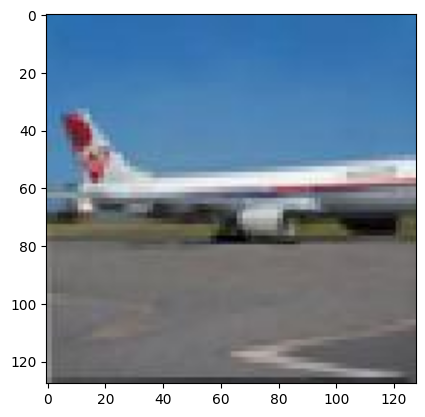

In [17]:
img, label = dataset[0]
print(classes[label])
plt.imshow(img.permute(1,2,0))

train


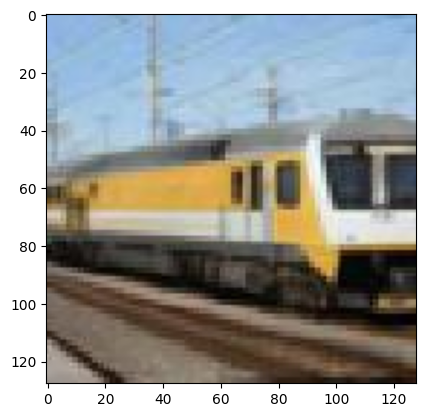

In [18]:
img, label = dataset[3064]
print(classes[label])
plt.imshow(img.permute(1,2,0))

In [19]:
for a , b in dataset:
    print(f'{type(a)},{type(b)}')
    break

<class 'torch.Tensor'>,<class 'int'>


In [20]:
for elem, label in dataset:
    break
elem, label

(tensor([[[0.1647, 0.1686, 0.1725,  ..., 0.1961, 0.2000, 0.2000],
          [0.1647, 0.1686, 0.1725,  ..., 0.1961, 0.1961, 0.1961],
          [0.1686, 0.1725, 0.1725,  ..., 0.2039, 0.2039, 0.2039],
          ...,
          [0.5686, 0.5608, 0.3922,  ..., 0.3255, 0.3176, 0.3176],
          [0.5020, 0.4863, 0.3137,  ..., 0.2627, 0.3020, 0.3294],
          [0.5176, 0.4980, 0.3216,  ..., 0.2431, 0.2902, 0.3216]],
 
         [[0.4392, 0.4431, 0.4471,  ..., 0.4667, 0.4706, 0.4706],
          [0.4392, 0.4431, 0.4471,  ..., 0.4667, 0.4667, 0.4667],
          [0.4431, 0.4471, 0.4471,  ..., 0.4627, 0.4627, 0.4627],
          ...,
          [0.5686, 0.5608, 0.3922,  ..., 0.3255, 0.3176, 0.3176],
          [0.5020, 0.4863, 0.3137,  ..., 0.2627, 0.3020, 0.3294],
          [0.5176, 0.4980, 0.3216,  ..., 0.2431, 0.2902, 0.3216]],
 
         [[0.6824, 0.6863, 0.6902,  ..., 0.6980, 0.7020, 0.7020],
          [0.6824, 0.6863, 0.6902,  ..., 0.6980, 0.6980, 0.6980],
          [0.6863, 0.6902, 0.6902,  ...,

<h2 id="data_processing">
Data processing
</h2>

First of all we have to convert all images to tensors:

In [21]:
random_seed = 42
torch.manual_seed(random_seed)

In [22]:
train_ds, val_ds = random_split(dataset,[0.8,0.2])

In [23]:
len(train_ds) , len(val_ds)

(3255, 813)

<h3 id="batch_size">Selecting batch size:</h3>

In [24]:
batch_size = 128

In [25]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True) #, num_workers=2, pin_memory=True)

In [26]:
val_dl = DataLoader(val_ds, batch_size) #, num_workers=2, pin_memory=True)

In [27]:
train_dl, val_dl

(<torch.utils.data.dataloader.DataLoader at 0x7f7f9c7af7f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7f9c7afe20>)

In [28]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    for count, (images, labels) in enumerate(dl):
        _, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        print(labels)
        if count == 0: break

tensor([2, 1, 6, 4, 7, 2, 7, 6, 7, 6, 7, 1, 4, 6, 3, 7, 0, 3, 2, 1, 0, 7, 2, 0,
        2, 4, 4, 4, 1, 4, 4, 4, 7, 3, 7, 5, 5, 0, 7, 0, 4, 1, 2, 2, 7, 4, 6, 1,
        2, 2, 6, 0, 5, 6, 2, 4, 2, 2, 3, 7, 4, 1, 0, 0, 0, 0, 4, 1, 1, 0, 5, 4,
        4, 0, 7, 0, 4, 7, 7, 4, 4, 3, 4, 6, 1, 2, 6, 4, 7, 5, 1, 2, 2, 4, 4, 4,
        0, 2, 4, 2, 7, 5, 5, 2, 7, 1, 3, 5, 4, 2, 1, 2, 7, 0, 7, 4, 2, 7, 0, 6,
        7, 1, 4, 3, 2, 5, 2, 1])


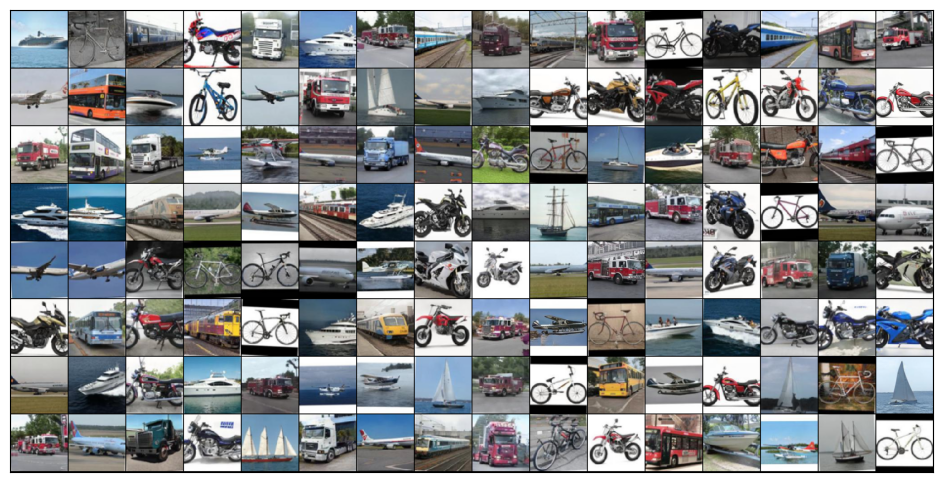

In [29]:
show_batch(train_dl)

tensor([7, 2, 0, 1, 4, 3, 0, 7, 0, 3, 2, 4, 7, 5, 0, 7, 2, 2, 3, 5, 4, 1, 2, 0,
        2, 7, 2, 4, 4, 7, 4, 7, 6, 2, 3, 7, 7, 7, 4, 1, 4, 7, 0, 4, 5, 1, 2, 4,
        4, 1, 0, 7, 7, 2, 4, 3, 1, 2, 2, 1, 4, 4, 0, 7, 2, 5, 7, 1, 4, 2, 6, 4,
        5, 6, 3, 0, 2, 6, 1, 4, 2, 4, 4, 4, 2, 0, 2, 7, 6, 1, 0, 4, 0, 1, 2, 1,
        1, 2, 6, 0, 7, 4, 7, 6, 6, 4, 2, 7, 6, 3, 5, 5, 2, 3, 4, 3, 0, 7, 7, 0,
        2, 7, 7, 3, 0, 0, 7, 5])


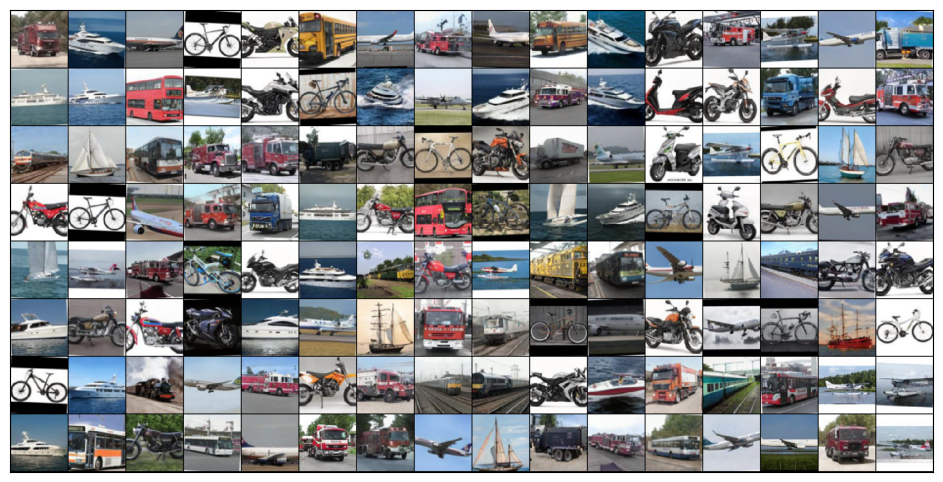

In [30]:
show_batch(val_dl)

<h2 id="create_classifier">Creating the classifier:</h2>

In [31]:
import torch.nn as nn
import torch.nn.functional as F

In [55]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
    
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

<p>
The formula for calcuating the outputs of a convolutional neural network is:
<br></p>
<h3>
<math>
    <mtext>
    <pre>
O = 
    </pre>
    </mtext>
    <mfrac>
        <mn>I + 2P - K</mn>
        <mn>S </mn>
    </mfrac>
    <mtext>
    <pre>
 + 1
     </pre>
    </mtext>
</math>
</h3><p>
where O: Output, I: Input, P: Padding, K: Kernel, S: Stride
<br></p>

In [33]:
c_o = 128 - 3 + 1
c_o

126

In [34]:
c_o/2

63.0

In [56]:
class Classifier(ImageClassificationBase):
    def __init__(self) -> None:
        super().__init__()
        self.nnmodel = nn.Sequential(
            # 3, 128, 128
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=0),
            # 16, 126, 126
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            # 16, 62, 62
            nn.Conv2d(16, 32, kernel_size=3, padding=0),
            # 32, 60, 60
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            # 32, 30, 30
            nn.Conv2d(32, 64, kernel_size=3, padding=0),
            # 64, 28, 28
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            # 64, 14, 14
            nn.Conv2d(64, 128, kernel_size=3, padding=0),
            # 128, 12, 12
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            # 128, 6, 6
            nn.Flatten(),

            # 128 * 6 * 6 = 4608
            nn.Linear(4608, 512),
            nn.ReLU(),
            #nn.BatchNorm2d(512),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.LogSoftmax(dim=1),
        )
    
    def forward(self, xb):
        return self.nnmodel(xb)



In [57]:
128*6*6

4608

In [58]:
model = Classifier()
model

Classifier(
  (nnmodel): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
 

<h2>
Training phase:
</h2>

In [59]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [60]:
evaluate(model, val_dl)

{'val_loss': 2.0907747745513916, 'val_acc': 0.16378967463970184}

In [61]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 0.0001

In [62]:
history = fit(1, 0.0001, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.3990, val_loss: 2.5898, val_acc: 0.1009


In [63]:
history = fit(1, 0.0005, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.7502, val_loss: 0.8212, val_acc: 0.6955


In [64]:
history = fit(1, 0.001, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6855, val_loss: 0.4431, val_acc: 0.8651


In [65]:
lr = 0.0005

In [66]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.2919, val_loss: 0.3195, val_acc: 0.9017
Epoch [1], train_loss: 0.1906, val_loss: 0.3114, val_acc: 0.8760
Epoch [2], train_loss: 0.1334, val_loss: 0.2472, val_acc: 0.9105
Epoch [3], train_loss: 0.0832, val_loss: 0.2549, val_acc: 0.9183
Epoch [4], train_loss: 0.0608, val_loss: 0.3144, val_acc: 0.9272
Epoch [5], train_loss: 0.0401, val_loss: 0.1778, val_acc: 0.9548
Epoch [6], train_loss: 0.0166, val_loss: 0.1626, val_acc: 0.9535
Epoch [7], train_loss: 0.0097, val_loss: 0.1457, val_acc: 0.9581


In [67]:
lr = 0.0001
num_epochs = 5

In [68]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.0078, val_loss: 0.1431, val_acc: 0.9605
Epoch [1], train_loss: 0.0043, val_loss: 0.1404, val_acc: 0.9657
Epoch [2], train_loss: 0.0040, val_loss: 0.1470, val_acc: 0.9635
Epoch [3], train_loss: 0.0032, val_loss: 0.1415, val_acc: 0.9637
Epoch [4], train_loss: 0.0030, val_loss: 0.1574, val_acc: 0.9561


In [69]:
evaluate(model, val_dl)

{'val_loss': 0.15744923055171967, 'val_acc': 0.9560515284538269}

In [70]:
torch.save(model.state_dict(), 'classifier01.pth')

In [94]:
img, label = val_ds[0]
a = model(img.unsqueeze(0))
_, b = a.max(dim=1)

In [95]:
a

tensor([[-2.2041e+01, -1.8229e+01, -1.8887e+01, -9.5128e+00, -1.3295e+01,
         -1.3970e+01, -9.0981e+00, -1.8833e-04]],
       grad_fn=<LogSoftmaxBackward0>)

In [96]:
b

tensor([7])

Predicted: truck, True: truck


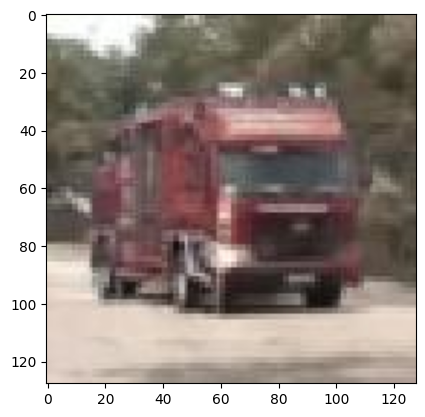

In [103]:
print(f'Predicted: {classes[b]}, True: {classes[label]}')
plt.imshow(img.permute(1,2,0))

In [93]:
print(classes[b])

truck


In [101]:
def predict(x):
    img, label = val_ds[x]
    a = model(img.unsqueeze(0))
    _, b = a.max(dim=1)
    print(f'Predicted: {classes[b]}, True: {classes[label]}')
    plt.imshow(img.permute(1,2,0))


Predicted: truck, True: truck


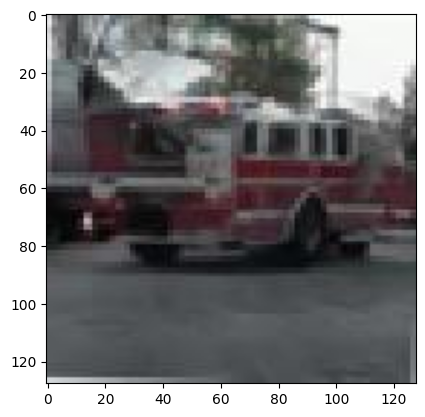

In [106]:
predict(145)

Predicted: boat, True: boat


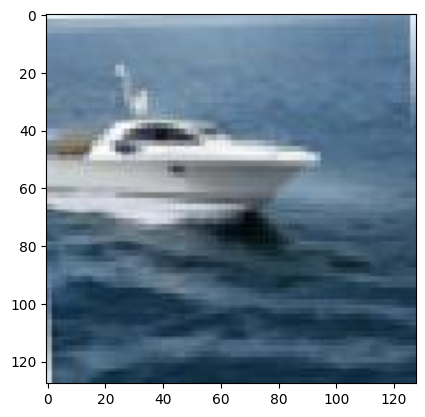

In [115]:
predict(588)

Predicted: seaplane, True: seaplane


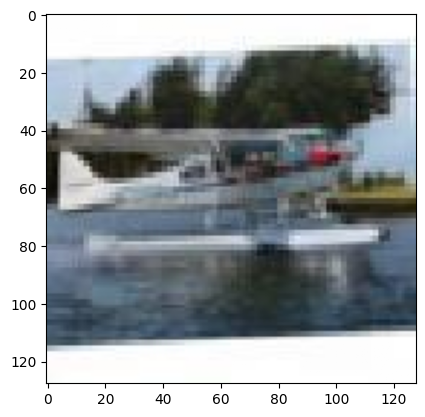

In [120]:
predict(13)

Predicted: train, True: truck


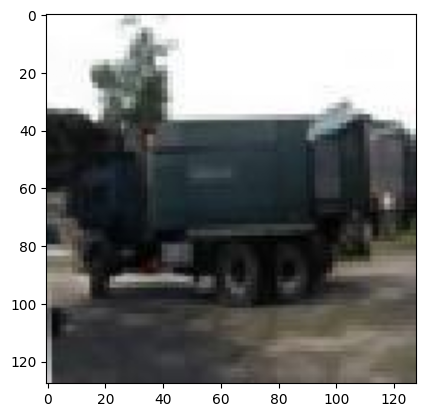

In [104]:
predict(37)

Predicted: motorbus, True: seaplane


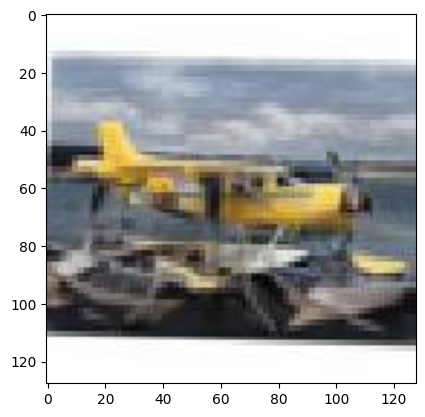

In [129]:
predict(354)